In [1]:
import ipycytoscape
import ipywidgets as widgets
import networkx as nx


# Undirected graph

In [2]:
G = nx.complete_graph(5)
undirected = ipycytoscape.CytoscapeWidget()
undirected.graph.add_graph_from_networkx(G)
undirected

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'background-c…

### You can also add more nodes 

The above graph should update when you run the next cell

In [3]:
G2 = nx.Graph()
G2.add_node('separate node 1')
G2.add_node('separate node 2')
G2.add_edge('separate node 1', 'separate node 2')
undirected.graph.add_graph_from_networkx(G2)


# Fully directed graphs

`add_graph_from_networkx` takes an argument `directed` that if True will ensure all edges given the directed class, which will style them with an arrow.

In [4]:
G = nx.complete_graph(5)
directed = ipycytoscape.CytoscapeWidget()
directed.graph.add_graph_from_networkx(G, directed=True)
directed

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'background-c…

# Mixed graphs

You can also make graphs with both directed and undirected edges by adding 'directed' to the 'classes' attribute of the edge data

In [5]:
from random import random

In [6]:
G = nx.complete_graph(5)
for s, t, data in G.edges(data=True):
    if random() > .5:
        G[s][t]['classes'] = 'directed'

mixed = ipycytoscape.CytoscapeWidget()
mixed.graph.add_graph_from_networkx(G)
mixed

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'background-c…

# Test Other Node Types

### Tuples
No errors but nothing renders


here is an image as github won't render the widget:
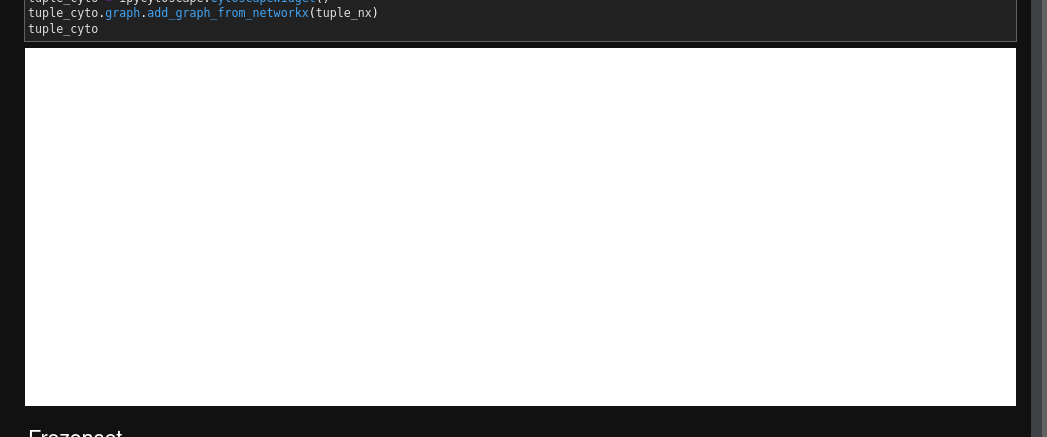

In [7]:




tuple_nx = nx.Graph()

tuple_nx.add_node((0, 1))
tuple_nx.add_node((0,2))
tuple_nx.add_edge((0,1), (0,2))
# nx.draw(tuple_nx)
tuple_cyto = ipycytoscape.CytoscapeWidget()
tuple_cyto.graph.add_graph_from_networkx(tuple_nx)
tuple_cyto

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'background-c…

## Frozenset

breaks with `Can't clean for JSON`

In [8]:
frozen_nx = nx.Graph()
frozen_nx.add_node(frozenset((0, 1)))
frozen_nx.add_node(frozenset((0, 2)))
frozen_nx.add_edge(frozenset((0,1)), frozenset((0,2)))

frozen_cyto = ipycytoscape.CytoscapeWidget()
frozen_cyto.graph.add_graph_from_networkx(frozen_nx)
frozen_cyto

ValueError: Can't clean for JSON: frozenset({0, 1})

## Custom Class
breaks with `Can't clean for JSON`

In [9]:

class Node:
    def __init__(self, name):
        self.name = name

n1 = Node("node 1")
n2 = Node("node 2")
        
G = nx.Graph()

G.add_node(n1)
G.add_node(n2)

G.add_edge(n1, n2)

undirected = ipycytoscape.CytoscapeWidget()
undirected.graph.add_graph_from_networkx(G)
undirected

ValueError: Can't clean for JSON: <__main__.Node object at 0x7fdc58c09d90>

## Custom Class that inherits from Node

breaks with `Can't clean for JSON`

In [14]:

class CustomNode(ipycytoscape.Node):
    def __init__(self, name, classes=''):
        super().__init__()
        self.data['name'] = name
        self.classes = classes

n1 = CustomNode("node 1")
n2 = CustomNode("node 2")
        
G = nx.Graph()

G.add_node(n1)
G.add_node(n2)

G.add_edge(n1, n2)

undirected = ipycytoscape.CytoscapeWidget()
undirected.graph.add_graph_from_networkx(G)
undirected

ValueError: Can't clean for JSON: CustomNode(data={'name': 'node 1'}, position={})

In [13]:
issubclass(type(n1), ipycytoscape.Node)

False